# SVD for Colour Image Compression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim

(252, 277, 4)


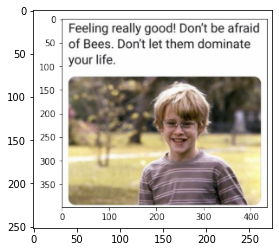

In [ ]:
image = Image.open("6.jpg")
img = np.array(image)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
def plotChannels(img):
    plt.imshow(img[:,:,0])
    plt.show()
    plt.imshow(img[:,:,1])
    plt.show()
    plt.imshow(img[:,:,2])
    plt.show()
    return img[:,:,0],img[:,:,1],img[:,:,2]

def CompressImage(img,k):
    red,green,blue = img[:,:,0],img[:,:,1],img[:,:,2]
    channels = [red,green,blue]
    comp_channels = []
    for channel in channels:
        U,S,V = np.linalg.svd(channel)
        sigma = np.diag(S[:k])
        compCh =  U[:,:k] @ sigma @ V[:k,:]
        comp_channels.append(compCh)
    CompIm = np.stack(comp_channels,axis = 2)
    
    return CompIm

def CompareSimilarity(orgIm,newIm,MSE = False,SSIM = True):
    const = np.linalg.norm(orgIm)
    if MSE:
        loss = np.linalg.norm(orgIm-newIm)
        NormLoss = loss/const
        # print(f'Mean Squared Error Loss due to compression of the Image using {k} sigular values is {loss}')
    if SSIM:
        score = ssim(orgIm, newIm, multichannel=True)
        # print(f'Structural Similarity score between the original and compressed Image using {k} singular values is {score}')
    
    return (NormLoss,score)

def CompressionTradeoff(img,num_exmp = 15,MSE = False,SSIM = True):
    max_limit = np.min(img.shape[:2])
    # arr = np.random.choice(np.arange(1, max_limit + 1), size=num_exmp, replace=False)
    # arr.sort()
    arr = np.arange(1,max_limit+1,step = 10)
    loss_arr = []
    score_arr = []
    for k in arr:
        CompIm = CompressImage(img,k)
        (loss,score) = CompareSimilarity(img,CompIm,MSE = MSE,SSIM = SSIM)
        loss_arr.append(loss)
        score_arr.append(score)
        CompIm = Image.fromarray(CompIm.astype('uint8'))
        print(f'Below Image is reconstructed by taking {k} singular values')
        plt.imshow(CompIm)
        plt.show()

    return (loss_arr,score_arr)

In [ ]:
(loss_arr,score_arr) = CompressionTradeoff(img,MSE=True)
plt.plot(loss_arr,label = "Relative MSE Loss")
plt.plot(score_arr, label = "Similarity Score")

plt.xlabel("Number of Singular Values")
# plt.ylabel("Values")
plt.legend()
plt.show()

# SVD for colour Video Compression

In [ ]:
import numpy as np
import cv2
from tqdm.notebook import trange

def VideoCompressor(Video, rank):
    Video = cv2.VideoCapture(Video)
    num_frames = int(Video.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(Video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(Video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f'Number of Frames are {num_frames}')
    CompArray = np.zeros((num_frames, frame_height, frame_width, 3), dtype=np.uint8)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    framerate_persec = 50
    CompVideo = cv2.VideoWriter('compressed_video.mp4', fourcc, framerate_persec, (frame_width, frame_height))
    for i in trange(num_frames):
        ret, frame = Video.read()
        if ret:
            CompFrame = CompressImage(frame,rank)
            CompArray[i] = CompFrame
    
    for frame in CompArray:
        CompVideo.write(frame)
    Video.release()
    CompVideo.release()
    return (Video,CompVideo,num_frames)

def CompareVideo(Video,CompVideo,num_frames):
    ssim_values = []
    mse_values = []
    Video = cv2.VideoCapture(Video)
    CompVideo = cv2.VideoCapture(CompVideo)
    for i in trange(num_frames):
        Video_ret, Video_frame = Video.read()
        CompVideo_ret, CompVideo_frame = CompVideo.read()
        # ssim = cv2.SSIM(Video_frame,CompVideo_frame, multichannel=True)
        if Video_ret and CompVideo_ret:
            VideoFrame = cv2.cvtColor(Video_frame, cv2.COLOR_BGR2RGB)
            CompVideoFrame = cv2.cvtColor(CompVideo_frame, cv2.COLOR_BGR2RGB)
            VideoImg = np.array(VideoFrame)
            CompVideoImg = np.array(CompVideoFrame)
            (NormLoss,score) = CompareSimilarity(VideoImg,CompVideoImg,MSE=True)
            mse_values.append(NormLoss)
            ssim_values.append(score)
    
    avg_mse = np.mean(mse_values)
    avg_ssim = np.mean(ssim_values)
    Video.release()
    CompVideo.release()
    return (avg_mse,avg_ssim)

81
Number of Frames are 132


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

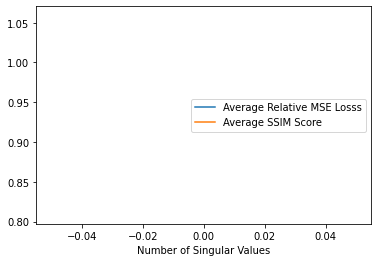

In [ ]:
arr = np.arange(1,100,step = 10)
loss_arr = []
score_arr = []
for k in arr:
    k = 81
    print(k)
    (Video,CompVideo,num_frames) = VideoCompressor("big_buck.mp4",k)
    (avg_mse,avg_ssim) = CompareVideo("big_buck.mp4","compressed_video.mp4",num_frames)
    loss_arr.append(avg_mse)
    score_arr.append(avg_ssim)
    break
plt.plot(loss_arr,label = "Average Relative MSE Losss")
plt.plot(score_arr,label = "Average SSIM Score")
plt.xlabel("Number of Singular Values")
plt.legend()
plt.show()

# Recommendation System

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

df_movies = pd.read_excel("movies.xlsx",sheet_name=0)
df_ratings = pd.read_excel("movies.xlsx",sheet_name = 1)
df_tags = pd.read_excel('movies.xlsx',sheet_name = 2)


In [ ]:
genre = []
moviegenre = []
arr = np.array(df_movies['genres'])
for s in arr:
    ls = s.split('|')
    moviegenre.append(ls)
    for i in ls:
        genre.append(i)

In [ ]:
len(genre)

9990

In [ ]:
genre = list(set(genre))

In [ ]:
print(len(genre))
print(genre)

19
['Fantasy', 'Children', 'Thriller', 'Horror', 'Comedy', 'Action', 'War', 'Western', 'Adventure', 'Documentary', 'Musical', 'Mystery', 'Romance', 'Animation', 'Sci-Fi', 'IMAX', 'Film-Noir', 'Crime', 'Drama']


In [ ]:
df_movies["movieGenre"] = pd.Series(moviegenre)

In [ ]:
df_movies.head()

,movieId,title,genres,movieGenre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
arr = np.array(df_ratings['movieId'])
movieGenre = []
for i in arr:
    print(i)
    movieGenre.append(df_movies.iloc[i-1]['movieGenre'])

2
29
32
47
50
112
151
223
253
260
293
296
318
337
367
541
589
593
653
919
924
1009
1036
1079
1080
1089
1090
1097
1136
1193
1196
1198
1200
1201
1208
1214
1215
1217
1219
1222
1240
1243
1246
1249
1258
1259
1261
1262
1266
1278
1291
1304
1321
1333
1348
1350
1358
1370
1374
1387
1525
1584
1750
1848
1920
1967
1994
1997
2021
2100
2118
2138
2140
2143
2173
2174
2193
2194
2253
2288
2291
2542
2628
2644
2648
2664
2683
2692
2716
2761
2762
2804
2872
2918
2944
2947
2959
2968
3000
3030
3037
3081
3153
3265
3438
3476
3479
3489
3499
3889
3932
3996
3997
4011
4027
4105
4128
4133
4226
4306
4446
4467
4571
4720
4754
4878
4896
4911
4915
4941
4980
4993
5026


IndexError: ignored

In [ ]:
moviearr = np.array(df_ratings[df_ratings['userId'] == 1]['movieId'])
usergenre = []
for i in moviearr:
    
    usergenre 

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-59-98fd66ed3001>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  user_genre = df_movies[df_movies['movieId'] == [df_ratings[df_ratings['userId'] == 1]]['movieId']]['movieGenre']


TypeError: ignored

In [ ]:
df_tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [ ]:
print(len(df_movies),len(df_ratings),len(df_tags),len(df_ratings['userId'].unique()),len(df_tags['tag'].unique()))

4999 815508 185511 7119 17633


In [ ]:
MG = np.zeros((len(df_movies['movieId'].unique()),len(genre)))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(genre)
print(integer_encoded)

[ 8  3 16 10  4  0 17 18  1  6 12 13 14  2 15 11  9  5  7]


In [ ]:
for i in range(MG.shape[0]):
    ls = df_movies.iloc[i]['movieGenre']
    for j in ls:
        MG[i][integer_encoded[genre.index(j)]] = 1

In [ ]:
UG = 

(4999, 19)

# New Section